# 1. tensorflow v2.XX 에서 V1사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor == 객체)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인할 수 있음

In [6]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [ ]:
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
node3 = tf.add(node1,node2)
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [11]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1,node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [16]:
# 평군값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.])
tensor = tf.reduce_mean(data)
sess.run(tensor)

2.0

In [138]:
# 랜덤값을 갖는 tensor
tensor = tf.random_normal([1]) # 평균0, 표준편차가 1인 난수 실수 1개
sess.run(tensor)

array([1.7874067], dtype=float32)

In [152]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화 
sess.run(w)

array([-1.6633062], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [160]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias(처음에는 랜덤값, 학습과정을 거쳐 정답에 수렴)
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse; 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W,b를 찾아내는 것
cost는 2차함수이므로 곡선그래프, 곡선위 미분값이 줄어드는 방향으로 W,b 수정(경사하강법)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 학습 5000번 학습(v2 에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train,cost,W,b])
    if not step%200:
        print('step',step,':',cost_val, W_val, b_val)

step 0 : 35.27352 [-1.2986572] [0.66085345]
step 200 : 0.017451484 [0.8469383] [1.3479455]
step 400 : 0.0066638067 [0.9054173] [1.2150087]
step 600 : 0.0025445572 [0.9415538] [1.1328621]
step 800 : 0.0009716309 [0.9638837] [1.0821005]
step 1000 : 0.0003710184 [0.9776824] [1.0507331]
step 1200 : 0.00014167475 [0.986209] [1.0313503]
step 1400 : 5.4098626e-05 [0.99147797] [1.0193726]
step 1600 : 2.0656726e-05 [0.994734] [1.0119708]
step 1800 : 7.887684e-06 [0.9967459] [1.0073973]
step 2000 : 3.0121628e-06 [0.9979891] [1.0045712]
step 2200 : 1.150209e-06 [0.9987573] [1.0028249]
step 2400 : 4.3936396e-07 [0.9992319] [1.0017459]
step 2600 : 1.6801197e-07 [0.999525] [1.0010796]
step 2800 : 6.431037e-08 [0.99970603] [1.0006679]
step 3000 : 2.4631456e-08 [0.9998181] [1.0004135]
step 3200 : 9.5863255e-09 [0.99988663] [1.0002578]
step 3400 : 3.750325e-09 [0.9999293] [1.0001613]
step 3600 : 1.4919408e-09 [0.9999555] [1.0001017]
step 3800 : 5.9532584e-10 [0.999972] [1.0000645]
step 4000 : 2.3660598

In [161]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W,b])

[array([0.9999891], dtype=float32), array([1.0000248], dtype=float32)]

In [163]:
W_, b_ = sess.run([W,b])
W_[0], b_[0]

(0.9999891, 1.0000248)

In [166]:
def predict(x):
    return W_[0]*x + b_[0]

In [170]:
print('예측값은 ', predict(9))

예측값은  9.999926626682281


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [169]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [171]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:239.3093719482422, W:[-0.09627295], b:[1.757273]
200째 : cost:0.03671792522072792, W:[1.9348351], b:[1.348306]
400째 : cost:0.003611550899222493, W:[1.9795628], b:[1.109237]
600째 : cost:0.00035522712278179824, W:[1.9935904], b:[1.0342593]
800째 : cost:3.4940407203976065e-05, W:[1.9979898], b:[1.0107448]
1000째 : cost:3.439258307480486e-06, W:[1.9993694], b:[1.003371]
1200째 : cost:3.3836244028861984e-07, W:[1.9998022], b:[1.0010574]
1400째 : cost:3.327442144041015e-08, W:[1.9999379], b:[1.0003316]
1600째 : cost:3.2815024031407347e-09, W:[1.9999804], b:[1.0001045]
1800째 : cost:3.1237731845656924e-10, W:[1.9999939], b:[1.0000323]
2000째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2200째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2400째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2600째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2800째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
3000째 : cost:3.470859016863059e-11, W:[1.

In [172]:
sess.run(H,feed_dict={x:5})

array([11.], dtype=float32)

In [173]:
sess.run(H, feed_dict={x:np.array([5,6,7])})

array([11.      , 12.999998, 14.999996], dtype=float32)

## 2.3 scale이 다른 데이터의 liner regression 구현(scale조정x)

In [175]:
# H = 2x+1
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(2001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:4275.02685546875, W:[7.8063216], b:[0.95517683]
200째 : cost:83.67530059814453, W:[10.195595], b:[-0.5809591]
400째 : cost:83.49999237060547, W:[10.270273], b:[-1.1338981]
600째 : cost:83.48393249511719, W:[10.292892], b:[-1.3013793]
800째 : cost:83.48247528076172, W:[10.299744], b:[-1.3521087]
1000째 : cost:83.4823226928711, W:[10.301819], b:[-1.3674725]
1200째 : cost:83.4823226928711, W:[10.302448], b:[-1.3721268]
1400째 : cost:83.48231506347656, W:[10.302638], b:[-1.3735374]
1600째 : cost:83.48230743408203, W:[10.302695], b:[-1.3739635]
1800째 : cost:83.48231506347656, W:[10.302713], b:[-1.3740919]
2000째 : cost:83.48231506347656, W:[10.302718], b:[-1.3741293]


In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(조정o)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
    - normalization = (X - Xmin) ÷ (Xmax - Xmin)  
        * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
        
- standardization(표준화): 평균0, 표준편차1로 조정
    - standardization = (X - Xmean(평균)) ÷ (Xstd(표준편차))
        * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)

In [ ]:
# 라이브러리를 쓰지 않고 정규화 

x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min()) / (x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


### 라이브러리를 쓰고 정규화 (MinMaxScaler 이용)

In [ ]:
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler() # x_data를 정규화 시킬 객체
scaled_x_data = scaler_x.fit_transform(x_data)

# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)


scaler_y = MinMaxScaler()
scaled_y_data = scaler_y.fit_transform(y_data)

np.column_stack([x_data,y_data,scaled_x_data,scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [ ]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%500 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:1.4108903408050537, W:[0.66991127], b:[1.3709705]
500째 : cost:0.019250866025686264, W:[0.75742924], b:[0.19672693]
1000째 : cost:0.010774565860629082, W:[0.9298419], b:[0.10565703]
1500째 : cost:0.009951695799827576, W:[0.9835615], b:[0.07728299]
2000째 : cost:0.009871812537312508, W:[1.0002996], b:[0.06844214]
2500째 : cost:0.00986405834555626, W:[1.0055147], b:[0.06568758]
3000째 : cost:0.009863307699561119, W:[1.0071393], b:[0.06482951]
3500째 : cost:0.009863228537142277, W:[1.0076455], b:[0.06456236]
4000째 : cost:0.009863224811851978, W:[1.0078009], b:[0.06447956]
4500째 : cost:0.009863225743174553, W:[1.0078511], b:[0.06445309]
5000째 : cost:0.009863224811851978, W:[1.0078539], b:[0.06445099]


In [214]:
scaled_input =scaler_x.transform(np.array([[2],[3]]))
print('모델 예측을 위한 입력 :', scaled_input)
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output)
print('결과', scaler_y.inverse_transform(scaled_output))

모델 예측을 위한 입력 : [[0.11111111]
 [0.22222222]]
모델 예측 결과 : [[0.17643476]
 [0.28841853]]
결과 [[19.231998]
 [29.534504]]


In [216]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

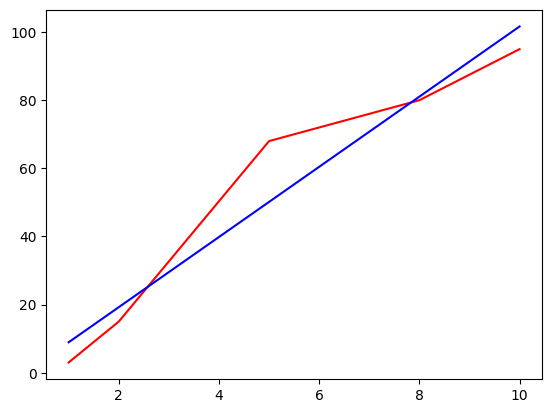

In [220]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

### 라이브러리를 쓰고 정규화 (StandardScaler 이용)

In [225]:
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)

print(np.column_stack([x_data,y_data]))
print(np.column_stack([scaled_x_data,scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


0째 : cost:1.6177539825439453, W:[0.44271386], b:[1.1033605]
500째 : cost:0.06268570572137833, W:[0.9681284], b:[4.527594e-05]
1000째 : cost:0.06268570572137833, W:[0.96814847], b:[5.471273e-09]
1500째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]
2000째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]
2500째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]
3000째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]
3500째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]
4000째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]
4500째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]
5000째 : cost:0.06268571317195892, W:[0.96814847], b:[-1.6731441e-08]


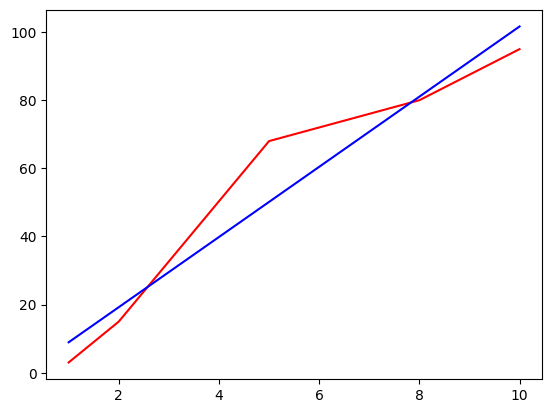

In [226]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%500 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2.5 독립변수 x가 3개, 종속변수 y가 1개 (csv->array)

### 방법1 : csv -> array

In [127]:
data = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=',',encoding='utf-8') #결측치와 헤더가 없을 때 사용하는 함수
data = np.genfromtxt('data/ozone.csv',
                     delimiter=',',
                     skip_header=1,
                     missing_values='NA',
                     filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

### ★ 방법2 : csv -> 데이터프레임 -> 결측치처리 ->array ★

In [2]:
data = pd.read_csv('data/ozone.csv')
data.isna().sum() # 열별 결측치 개수

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

#### 결측치 처리 방법1 : 결측치가 있는 행을 제거

In [ ]:
data.dropna(how='any', axis=0).head()


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


#### 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)

In [ ]:
data.fillna(value=data.mean()).head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


#### 결측치 처리 방법3 : 결측치 대체(월별 열별 평균값으로 대체)

In [3]:
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean() 

In [13]:
def fill_nan(row):
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    pd.options.mode.copy_on_write = True 
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row.Month,'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month,'Solar.R']
    return row

In [14]:
data = data.apply(fill_nan,axis=1)
X_data = data[['Solar.R','Wind','Temp']].values
y_data = data[['Ozone']].values
X_data.shape, y_data.shape

((153, 3), (153, 1))

In [36]:
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
H = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(H-y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer()) 
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))


1000번째 cost:547.422607421875
2000번째 cost:504.927734375
3000번째 cost:483.62213134765625
4000번째 cost:472.9379577636719
5000번째 cost:467.5779724121094
6000번째 cost:464.8868408203125
7000번째 cost:463.53350830078125
8000번째 cost:462.8507080078125
9000번째 cost:462.5039367675781
10000번째 cost:462.3257141113281
11000번째 cost:462.2320251464844
12000번째 cost:462.18060302734375
13000번째 cost:462.1505432128906
14000번째 cost:462.130859375
15000번째 cost:462.1167297363281
16000번째 cost:462.105224609375
17000번째 cost:462.0950927734375
18000번째 cost:462.0855712890625
19000번째 cost:462.0763854980469
20000번째 cost:462.06744384765625
최종 cost:462.06744384765625, W:[[ 0.05536107]
 [-3.5853474 ]
 [ 0.8610135 ]], b:[-0.30630374]


In [ ]:
# 예측하기
input_data = np.array([[190, 7.4, 67]])
sess.run(H, feed_dict={X:input_data})

array([[41.368633]], dtype=float32)

### 스케일 조정
- MinMaxScaler, StandardScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)

In [45]:
np.column_stack([scaled_X_data,scaled_y_data])

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084],
       [0.43425076, 0.57368421, 0.43902439, 0.06586826],
       [0.93577982, 0.51578947, 0.14634146, 0.10179641],
       [0.5330162 , 0.66315789, 0.        , 0.13542146],
       [0.5330162 , 0.69473684, 0.24390244, 0.16167665],
       [0.89296636, 0.36315789, 0.2195122 , 0.13173653],
       [0.28134557, 0.63684211, 0.07317073, 0.10778443],
       [0.03669725, 0.96842105, 0.12195122, 0.04191617],
       [0.57186544, 0.36315789, 0.31707317, 0.13542146],
       [0.5330162 , 0.27368421, 0.43902439, 0.03592814],
       [0.76146789, 0.42105263, 0.31707317, 0.08982036],
       [0.86544343, 0.39473684, 0.24390244, 0.05988024],
       [0.81651376, 0.48421053, 0.29268293, 0.07784431],
       [0.17737003, 0.60526316, 0.04878049, 0.10179641],
       [1.        , 0.51578947, 0.19512195, 0.07784431],
       [0.91743119, 0.54210526, 0.24390244, 0.19760479],
       [0.21712538, 0.87894737,

In [61]:
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
H = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(H-y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer()) 
for step in range(1, 100001):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_X_data,
                                                    y:scaled_y_data})
    if step%10000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

10000번째 cost:0.05113378167152405
20000번째 cost:0.022558780387043953
30000번째 cost:0.0178383719176054
40000번째 cost:0.016611682251095772
50000번째 cost:0.01611565798521042
60000번째 cost:0.01586802490055561
70000번째 cost:0.015736201778054237
80000번째 cost:0.01566486246883869
90000번째 cost:0.01562609151005745
100000번째 cost:0.015605013817548752
최종 cost:0.015605013817548752, W:[[ 0.10035958]
 [-0.25217062]
 [ 0.38131407]], b:[0.08958085]


In [ ]:
# 예측하기
input_data = np.array([[0 , 0.  , 0. ]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.fit_transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

array([[15.960002]], dtype=float32)

# 3. 이진분류 = Logistic Regression (분류분석)
- logistic 회귀분석 : 기본의 회귀분석과 다른 처리 필요

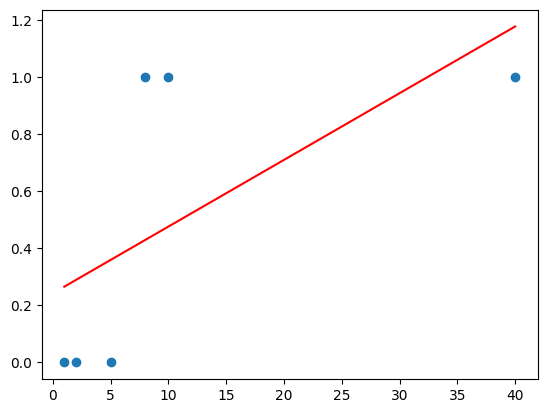

In [80]:
x = np.array([1,2,5,8,10,40])
y = np.array([0,0,0,1,1,1]) # 실제값
from scipy import stats
lm = stats.linregress(x,y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x,H,'r')
plt.scatter(x,y)

In [ ]:
X_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0],])
# tensorflow 구현(tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
#cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%800==0:
        print("{}번째 cost:{}".format(step, cost_val))

800번째 cost:0.21414317190647125
1600번째 cost:0.16730518639087677
2400번째 cost:0.14088109135627747
3200번째 cost:0.12197598069906235
4000번째 cost:0.10740786790847778
4800번째 cost:0.09577847272157669
5600번째 cost:0.08628468960523605
6400번째 cost:0.07840246707201004
7200번째 cost:0.07176700979471207
8000번째 cost:0.06611422449350357


In [100]:
input_data = np.array([[5,2]])
predict = tf.cast(H>=0.5, dtype=tf.float32)
sess.run(predict, feed_dict={X:input_data})


array([[1.]], dtype=float32)

In [102]:
# accuracy
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data, y:y_data}))

모델 정확도 : 1.0


# 4. XOR

In [160]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],[1],[1],[0]])

X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))

logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data, y:y_data})
    if not step%1000:
        print('{}번째 cost:{}'.format(step,cost_val))

1000번째 cost:0.7278733253479004
2000번째 cost:0.7044442892074585
3000번째 cost:0.6969394683837891
4000번째 cost:0.6944760680198669
5000번째 cost:0.693637490272522
6000번째 cost:0.6933375597000122
7000번째 cost:0.6932245492935181
8000번째 cost:0.693179726600647
9000번째 cost:0.6931612491607666
10000번째 cost:0.6931533813476562


In [163]:
# accuracy
predict = tf.cast(H<=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data, y:y_data}))

모델 정확도 : 0.5


# 5.Deep Learning XOR 예제

In [171]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],[1],[1],[0]])

X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : (입력2, 출력4)
W1 = tf.Variable(tf.random.normal([2, 4]))
b1= tf.Variable(tf.random.normal([4]))
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)

# layer2 : (입력4, 출력1)
W2 = tf.Variable(tf.random.normal([4, 1]))
b2= tf.Variable(tf.random.normal([1]))
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data, y:y_data})
    if not step%1000:
        print('{}번째 cost:{}'.format(step,cost_val))



1000번째 cost:0.19340091943740845
2000번째 cost:0.09193477779626846
3000번째 cost:0.05247368663549423
4000번째 cost:0.034484997391700745
5000번째 cost:0.02514813467860222
6000번째 cost:0.019428277388215065
7000번째 cost:0.01563146710395813
8000번째 cost:0.012968022376298904
9000번째 cost:0.011009352281689644
10000번째 cost:0.009519815444946289


In [172]:
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(H, feed_dict={X:X_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data, y:y_data}))

모델 정확도 : 1.0


## layer층 x_data 2개 -> 4 -> 1을
## layer층 x_data 2개 -> 10 -> 20 -> 10 -> 1
        입력층 hidden layer(relu) 출력층(sigmoid)

In [175]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],[1],[1],[0]])

X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : (입력2, 출력10)
W1 = tf.Variable(tf.random.normal([2, 10]))
b1= tf.Variable(tf.random.normal([10]))
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)

# layer2 : (입력10, 출력20)
W2 = tf.Variable(tf.random.normal([10, 20]))
b2= tf.Variable(tf.random.normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

# layer3 : (입력20, 출력10)
W3 = tf.Variable(tf.random.normal([20, 10]))
b3= tf.Variable(tf.random.normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2,W3) + b3)

# logits : (입력10, 출력1)
W4 = tf.Variable(tf.random.normal([10, 1]))
b4= tf.Variable(tf.random.normal([1]))
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data, y:y_data})
    if not step%1000:
        print('{}번째 cost:{}'.format(step,cost_val))

1000번째 cost:0.0016363824252039194
2000번째 cost:0.0007929515559226274
3000번째 cost:0.0005419917870312929
4000번째 cost:0.0004088893183507025
5000번째 cost:0.000326389679685235
6000번째 cost:0.0002703905338421464
7000번째 cost:0.0002300707419635728
8000번째 cost:0.00019972285372205079
9000번째 cost:0.00017608371854294091
10000번째 cost:0.00015720220108050853


In [176]:
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(H, feed_dict={X:X_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data, y:y_data}))

모델 정확도 : 1.0
